## Predicción de fugas de clientes en una compañía telefónica

Una compañía telefónica está interesada en que desarrollemos un modelo que prediga los clientes que tienen más probabilidad de abandonar la compañía. Para ello nos proporcionan una base de datos, **fuga_clientes_empresa_telefonica_construccion.csv**, con casos etiquetados.

Los campos de esta base de datos son:

* **Customer ID**
* **network_age**
* **Customer tenure in months:** tiempo transcurrido en meses desde que el suscriptor comenzó a utilizar los servicios del proveedor de la red
* **Total Spend in Months 1 and 2 of 2017:** gasto total del cliente en los meses de julio y agosto de 2017
* **Total SMS Spend:** gasto total en SMS
* **Total Data Spend:** gasto total en datos/internet
* **Total Data Consumption:** consumo total de datos (en KB) durante el período de estudio
* **Total Unique Calls:** número total de llamadas únicas 
* **Total Onnet spend:** gasto total en llamadas a otros usuarios de la misma red de telefonía
* **Total Offnet spend:** gasto total en llamadas a otros usuarios de redes de telefonía diferentes
* **Total Call centre complaint calls:** número de llamadas de queja al call center
* **Network type subscription in Month 1:** suscripción de tipo de red en el mes 1. Esto indica la suscripción de red preferida de un cliente, lo que puede indicar su tipo de dispositivo: servicio 2G o 3G
* **Network type subscription in Month 2:** igual que el anterior pero en el mes posterior
* **Most Loved Competitor network in in Month 1:** qué otro proveedor de la competencia prefiere el cliente en el mes 1
* **Most Loved Competitor network in in Month 2:** qué otro proveedor de la competencia prefiere el cliente en el mes 2
* **Churn Status**: el valor es 1 si el cliente abandona la compañía telefónica, 0 si permanece en ella

La variable a predecir es **Churn Status**: el valor es 1 si el cliente **abandona** la compañía, 0 si no la abandona.

La compañía también nos proporciona otra base de datos, **fuga_clientes_empresa_telefonica_explotacion.csv**, con información sobre clientes de los que no se sabe ahora mismo si van a permanecer o no en la compañía. Por tanto en esta segunda base de datos todos los valores de la columna **Churn Status** son missing values (NaN).

La compañía nos pide que proporcionemos los IDs de 100 clientes de la base de datos de explotación que vayan a abandonar la compañía. Para ello proporcionaremos como entregable a la compañía un archivo csv con una sola columna, **Customer ID**, y 100 filas que contengan los IDs de los clientes seleccionados.

### 1 Imports

In [1]:
# Minimal (Core Libraries)
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2 Carga y Limpieza de los Datos

In [3]:
data = pd.read_csv(
    "./fuga_clientes_empresa_telefonica_construccion.csv"
) # Train Set. El conjunto de test es invisible para facilitar la eval en la competicion (Datathon)

In [4]:
data.isna().sum()

Customer ID                                     0
network_age                                     0
Customer tenure in month                        0
Total Spend in Months 1 and 2 of 2017           0
Total SMS Spend                                 0
Total Data Spend                                0
Total Data Consumption                          0
Total Unique Calls                              0
Total Onnet spend                               0
Total Offnet spend                              0
Total Call centre complaint calls               0
Network type subscription in Month 1            0
Network type subscription in Month 2           22
Most Loved Competitor network in in Month 1     1
Most Loved Competitor network in in Month 2     1
Churn Status                                    0
dtype: int64

In [5]:
data.shape[0]

1111

In [6]:
data.describe()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,1512.755176,50.425257,834.722058,30.659469,67.214968,2.341847e+06,202.863186,6060.639964,16259.369037,1.985599,0.485149
std,1271.675167,42.389049,1317.299763,58.605916,323.572908,7.340746e+06,300.182565,11965.611198,37216.839277,2.496442,0.500004
min,-5.000000,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.000000,1.000000,0.000000
25%,381.500000,12.715000,172.292000,3.480000,1.250000,1.417291e+03,18.000000,36.000000,1107.500000,1.000000,0.000000
50%,1244.000000,41.470000,615.730000,14.000000,11.250000,1.485742e+05,82.000000,1482.000000,4176.000000,1.000000,0.000000
75%,2290.500000,76.350000,1021.236600,31.635000,50.625000,1.303951e+06,251.000000,6678.000000,13321.000000,2.000000,1.000000
max,5451.000000,181.700000,24438.830000,665.000000,8295.000000,9.945640e+07,2184.000000,146344.000000,384648.000000,49.000000,1.000000


In [7]:
# 1. Datos Crudos
data["Churn Status"].value_counts()

0    572
1    539
Name: Churn Status, dtype: int64

In [8]:
# 2. Datos sin valores nulos (`NaNs`) (filtrados)
data.dropna()["Churn Status"].value_counts()

0    560
1    528
Name: Churn Status, dtype: int64

* Variable Respuesta bien balanceada (incluso después de limpieza de valores nulos)

In [9]:
data.describe().loc[["mean","std"],:] # Dataset Original

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
mean,1512.755176,50.425257,834.722058,30.659469,67.214968,2.341847e+06,202.863186,6060.639964,16259.369037,1.985599,0.485149
std,1271.675167,42.389049,1317.299763,58.605916,323.572908,7.340746e+06,300.182565,11965.611198,37216.839277,2.496442,0.500004


In [10]:
data.dropna().describe().loc[["mean","std"],:] # Dataset con los valores nulos filtrados

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
mean,1523.884191,50.796204,831.880289,30.658244,65.763631,2.291611e+06,203.181066,5951.945772,16184.212316,1.976103,0.485294
std,1275.816360,42.527099,1319.808887,58.571320,324.673078,7.221854e+06,301.200089,11199.613655,37225.319929,2.490345,0.500014


*Conclusión:* Eliminar datos faltantes tiene muy poco impacto en los descriptivos (en sentido media-varianza), por lo que, a lo largo del resto del cuaderno, trabajaremos con el dataset limpio de `NaNs` y sin imputación alguna de los valores faltantes.

In [11]:
data.dropna(inplace=True)

In [12]:
# Double Check
data.isna().sum()

Customer ID                                    0
network_age                                    0
Customer tenure in month                       0
Total Spend in Months 1 and 2 of 2017          0
Total SMS Spend                                0
Total Data Spend                               0
Total Data Consumption                         0
Total Unique Calls                             0
Total Onnet spend                              0
Total Offnet spend                             0
Total Call centre complaint calls              0
Network type subscription in Month 1           0
Network type subscription in Month 2           0
Most Loved Competitor network in in Month 1    0
Most Loved Competitor network in in Month 2    0
Churn Status                                   0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 0 to 1110
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Customer ID                                  1088 non-null   object 
 1   network_age                                  1088 non-null   int64  
 2   Customer tenure in month                     1088 non-null   float64
 3   Total Spend in Months 1 and 2 of 2017        1088 non-null   float64
 4   Total SMS Spend                              1088 non-null   float64
 5   Total Data Spend                             1088 non-null   float64
 6   Total Data Consumption                       1088 non-null   float64
 7   Total Unique Calls                           1088 non-null   int64  
 8   Total Onnet spend                            1088 non-null   int64  
 9   Total Offnet spend                           1088 non-null   int64  
 10  

### 3 Análisis Exploratorio de los Datos

In [14]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
data       DataFrame         Customer ID  network<...>n[1088 rows x 16 columns]


<u>**NOTA**</u>: Se hace copia valor del `df` original con el fin de probar ciertas transformaciones sobre los datos numéricos y filtrar observaciones de campos categóricos que sin ser valores nulos, no tienen sentido

In [15]:
# Copia (by Vaues) para mantener una copia original limpia de valores nulos previa a transformaciones.
data_c = data.copy()

In [16]:
numerical_features = data_c.columns[data_c.dtypes!="object"].tolist()[:-1]
print(numerical_features)

['network_age', 'Customer tenure in month', 'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend', 'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls', 'Total Onnet spend', 'Total Offnet spend', 'Total Call centre complaint calls']


In [17]:
categorical_features = data_c.columns[data_c.dtypes=="object"].tolist()
print(categorical_features)

['Customer ID', 'Network type subscription in Month 1', 'Network type subscription in Month 2', 'Most Loved Competitor network in in Month 1', 'Most Loved Competitor network in in Month 2']


In [18]:
# La primera caracteristica no es numerica ni categorica, puesto que identifica al cliente 
# (puede ser instrumental para clientes a nivel de inferencia o predictivo)
categorical_features = categorical_features[1:]
categorical_features

['Network type subscription in Month 1',
 'Network type subscription in Month 2',
 'Most Loved Competitor network in in Month 1',
 'Most Loved Competitor network in in Month 2']

#### 3.1 Preproceso Variables Categóricas (sin recodificación)

In [19]:
net_type_month1 = data_c["Network type subscription in Month 1"].unique()
net_type_month2 = data_c["Network type subscription in Month 2"].unique()

In [20]:
print(net_type_month1,"\n",net_type_month2)

['2G' '3G' 'Other'] 
 ['2G' '3G' 'Other']


In [21]:
CompetitorsMonth1 = data_c["Most Loved Competitor network in in Month 1"].unique()
CompetitorsMonth2 = data_c["Most Loved Competitor network in in Month 2"].unique()
set(CompetitorsMonth1).difference(set(CompetitorsMonth2))

{'0'}

In [22]:
# Caracterizacion Variables Categoricas
print(f"Network type subscription in Month 1 categories: {net_type_month1}")
print(f"Network type subscription in Month 2 categories: {net_type_month2}")
nchar = len("Network type subscription in Month 2 categories")
print("="*nchar+"=="+"="*len(str(net_type_month2)))


print(f"Most Loved Competitor network in in Month 1: {CompetitorsMonth1}")
print(f"Most Loved Competitor network in in Month 2: {CompetitorsMonth2}")


Network type subscription in Month 1 categories: ['2G' '3G' 'Other']
Network type subscription in Month 2 categories: ['2G' '3G' 'Other']
Most Loved Competitor network in in Month 1: ['Uxaa' 'Weematel' '0' 'Zintel' 'Mango' 'ToCall' 'PQza']
Most Loved Competitor network in in Month 2: ['Mango' 'PQza' 'ToCall' 'Uxaa' 'Weematel' 'Zintel']


Filtramos el valor de Telco aparentemente mal recogido `"0"`

In [23]:
data_c = data_c[data_c["Most Loved Competitor network in in Month 1"]!="0"]
data_c["Most Loved Competitor network in in Month 1"].unique()

array(['Uxaa', 'Weematel', 'Zintel', 'Mango', 'ToCall', 'PQza'],
      dtype=object)

In [24]:
data_c.shape

(1058, 16)

**Conclusion**: Hemos regularizado algunos valores anómalos en las variables categoricas que dado que son minoritarios, no se espera que afecten significativamente al análisis posterior

<u>*Simplificación* de nombres</u>: simplificamos el etiquetado de variables características para mejor manejo posterior.

In [25]:
categorical_features_simple_names = ["net_type_mo1","net_type_mo2","competitor_mo1","competitor_mo2"]
renamer_dict = {key: value for key,value in zip(categorical_features,categorical_features_simple_names)}
renamer_dict

{'Network type subscription in Month 1': 'net_type_mo1',
 'Network type subscription in Month 2': 'net_type_mo2',
 'Most Loved Competitor network in in Month 1': 'competitor_mo1',
 'Most Loved Competitor network in in Month 2': 'competitor_mo2'}

In [26]:
# Renaming
data_c.rename(renamer_dict, inplace=True)

#### 3.2 Preproceso Variables Numéricas

1. **Simplificacion** de nombres:
De nuevo, redefinimos nombres para hacerlos más manejables.

In [27]:
numerical_features

['network_age',
 'Customer tenure in month',
 'Total Spend in Months 1 and 2 of 2017',
 'Total SMS Spend',
 'Total Data Spend',
 'Total Data Consumption',
 'Total Unique Calls',
 'Total Onnet spend',
 'Total Offnet spend',
 'Total Call centre complaint calls']

In [28]:
numerical_features_simple_names = [
    "network_age",
    "tenure",
    "spend_mo12",
    "sms_spend",
    "data_spend",
    "data_consume",
    "calls",
    "onnet_spend",
    "offnet_spend",
    "complaint_calls"
]

In [29]:
print(len(numerical_features))
len(numerical_features_simple_names)

10


10

In [30]:
num_renamer_dict = {old:new for (old,new) in zip(numerical_features,numerical_features_simple_names) }

In [31]:
num_renamer_dict

{'network_age': 'network_age',
 'Customer tenure in month': 'tenure',
 'Total Spend in Months 1 and 2 of 2017': 'spend_mo12',
 'Total SMS Spend': 'sms_spend',
 'Total Data Spend': 'data_spend',
 'Total Data Consumption': 'data_consume',
 'Total Unique Calls': 'calls',
 'Total Onnet spend': 'onnet_spend',
 'Total Offnet spend': 'offnet_spend',
 'Total Call centre complaint calls': 'complaint_calls'}

In [32]:
numerical_features

['network_age',
 'Customer tenure in month',
 'Total Spend in Months 1 and 2 of 2017',
 'Total SMS Spend',
 'Total Data Spend',
 'Total Data Consumption',
 'Total Unique Calls',
 'Total Onnet spend',
 'Total Offnet spend',
 'Total Call centre complaint calls']

In [33]:
data_c.rename(columns=num_renamer_dict, inplace=True)
data_c.columns

Index(['Customer ID', 'network_age', 'tenure', 'spend_mo12', 'sms_spend',
       'data_spend', 'data_consume', 'calls', 'onnet_spend', 'offnet_spend',
       'complaint_calls', 'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status'],
      dtype='object')

In [34]:
data_c.head()

,Customer ID,network_age,tenure,spend_mo12,sms_spend,data_spend,data_consume,calls,onnet_spend,offnet_spend,complaint_calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,2G,2G,Uxaa,Mango,0
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,2G,2G,Uxaa,Mango,0
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,2G,2G,Weematel,Mango,0
4,ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,2G,3G,Weematel,Mango,0
5,ADF0066,158,5.27,792.1144,28.63,108.75,107713.5820,101,7296,16636,1,2G,2G,Uxaa,Mango,0


2. **Análisis de la Asimetría**: gran parte de las observaciones exhiben asimetria positiva, en algun caso muy positiva, lo que las aleja de la normalidad

In [35]:
data_c[numerical_features_simple_names].skew()

network_age         0.778929
tenure              0.778922
spend_mo12          8.710053
sms_spend           5.753997
data_spend         17.768406
data_consume        6.887816
calls               2.759475
onnet_spend         3.954381
offnet_spend        5.350458
complaint_calls     8.464482
dtype: float64

3. Además, **gráficamente**, podemos hacernos una idea del grado de asimetría positiva y otras características distribucionales.

In [36]:
len(numerical_features_simple_names)

10

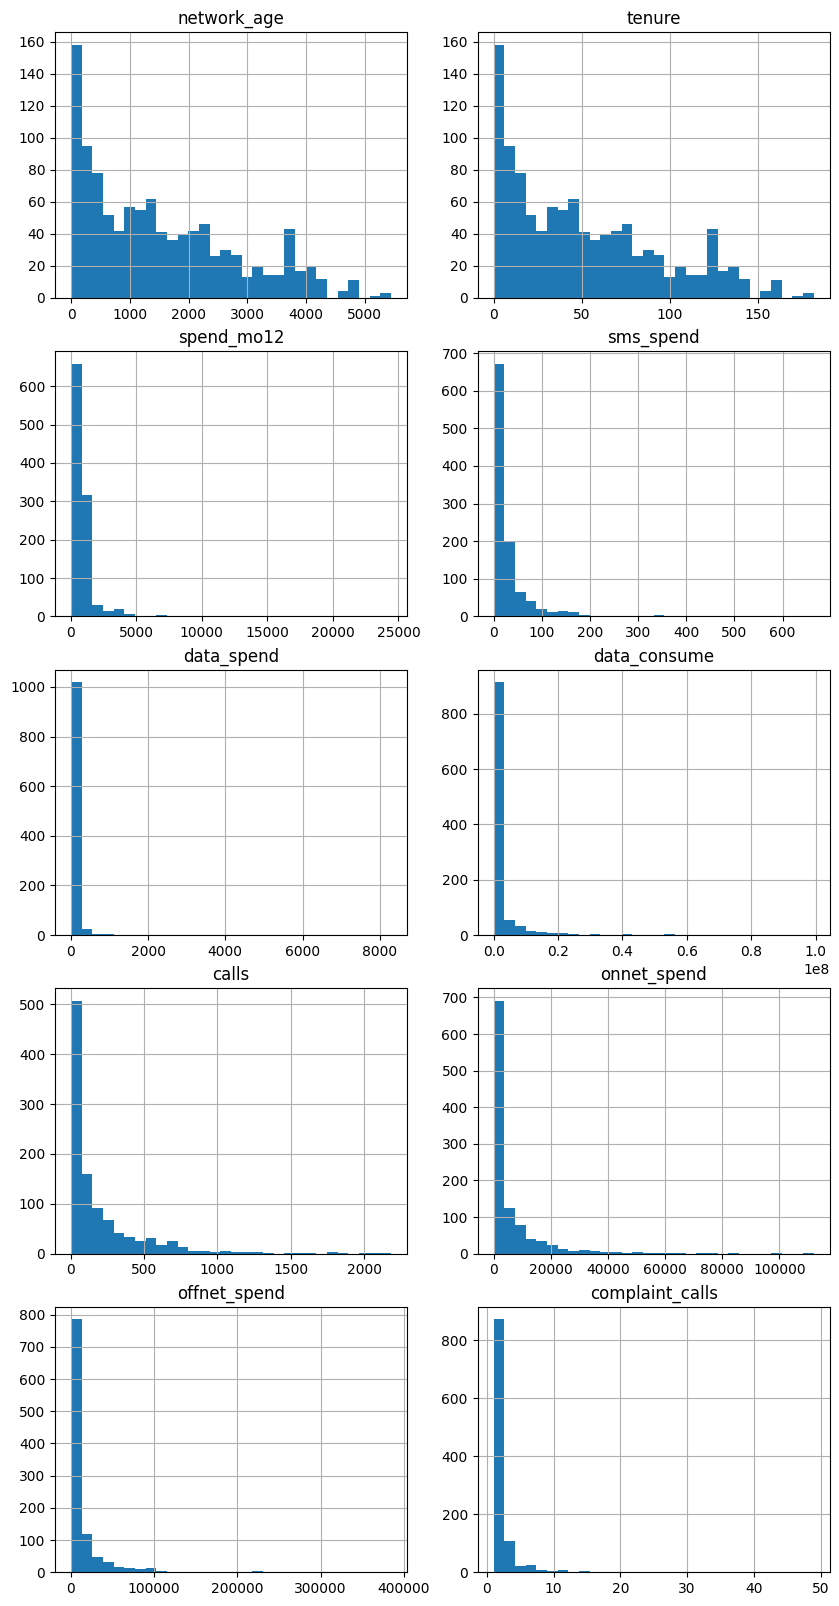

In [37]:
fig,ax = plt.subplots(5,2, figsize=(10,20))

for i,ax in enumerate(ax.flat):
    ax.hist(data_c[numerical_features_simple_names[i]], bins=30)
    ax.set_title(numerical_features_simple_names[i])
    ax.grid()

La disparidad de escalas y la elevada asimetría positiva sugiere que utilicemos una transformacion (`Scaler`) de tipo `Box-Cox`.
Utilizamos la transformación sobre las variables numéricas para todas las muestras, antes de realizar la partición en conjunto de entrenamiento y test e integrarlas en un `ColumnTransformer()`, dado que queremos visualizar los efectos (beneficiosos) de su aplicación.

Sin embargo, previo a la aplicación de este tipo de transformaciones es deseable que filtremos de nuevo, más valores que sin ser nulos (`NaN`) no tienen sentido.

In [38]:
data_c[numerical_features_simple_names].where(lambda x: x<0).sum(axis=0)

network_age       -9.0
tenure            -0.3
spend_mo12         0.0
sms_spend          0.0
data_spend         0.0
data_consume       0.0
calls              0.0
onnet_spend        0.0
offnet_spend       0.0
complaint_calls    0.0
dtype: float64

In [39]:
data_c.shape

(1058, 16)

In [40]:
data_c.loc[(data_c['network_age'] <= 0) | (data_c['tenure'] <= 0)]

,Customer ID,network_age,tenure,spend_mo12,sms_spend,data_spend,data_consume,calls,onnet_spend,offnet_spend,complaint_calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
490,ADF0631,-5,-0.17,857.1008,63.47,190.03,1.565901e+06,204,716,1240,1,3G,3G,ToCall,ToCall,1
916,ADF1925,-4,-0.13,2898.8240,25.10,1.25,3.058533e+05,642,0,82221,1,3G,3G,Mango,Weematel,1


In [41]:
data_c = data_c.loc[ (data_c['network_age'] >= 0) & (data_c['tenure'] >= 0)]

In [42]:
data_c.shape

(1056, 16)

In [43]:
numerical_features_simple_names

['network_age',
 'tenure',
 'spend_mo12',
 'sms_spend',
 'data_spend',
 'data_consume',
 'calls',
 'onnet_spend',
 'offnet_spend',
 'complaint_calls']

In [44]:
type(data_c)

pandas.core.frame.DataFrame

In [45]:
data_c[numerical_features_simple_names]

,network_age,tenure,spend_mo12,sms_spend,data_spend,data_consume,calls,onnet_spend,offnet_spend,complaint_calls
0,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2
1,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1
2,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1
4,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1
5,158,5.27,792.1144,28.63,108.75,107713.5820,101,7296,16636,1
...,...,...,...,...,...,...,...,...,...,...
1106,3994,133.13,804.0848,7.00,0.00,2364.6768,127,30071,8091,2
1107,731,24.37,828.7404,3.52,2.50,35674.9864,660,10912,20756,7
1108,2971,99.03,832.7248,9.62,2.50,103008.5605,224,37401,29553,3
1109,595,19.83,839.5724,73.80,8.75,229.4463,102,21304,7894,1


In [46]:
from sklearn.preprocessing import PowerTransformer # 
pt = PowerTransformer()

data_num_scaled = pt.fit_transform(data_c[numerical_features_simple_names])

In [47]:
data_num_scaled.shape

(1056, 10)

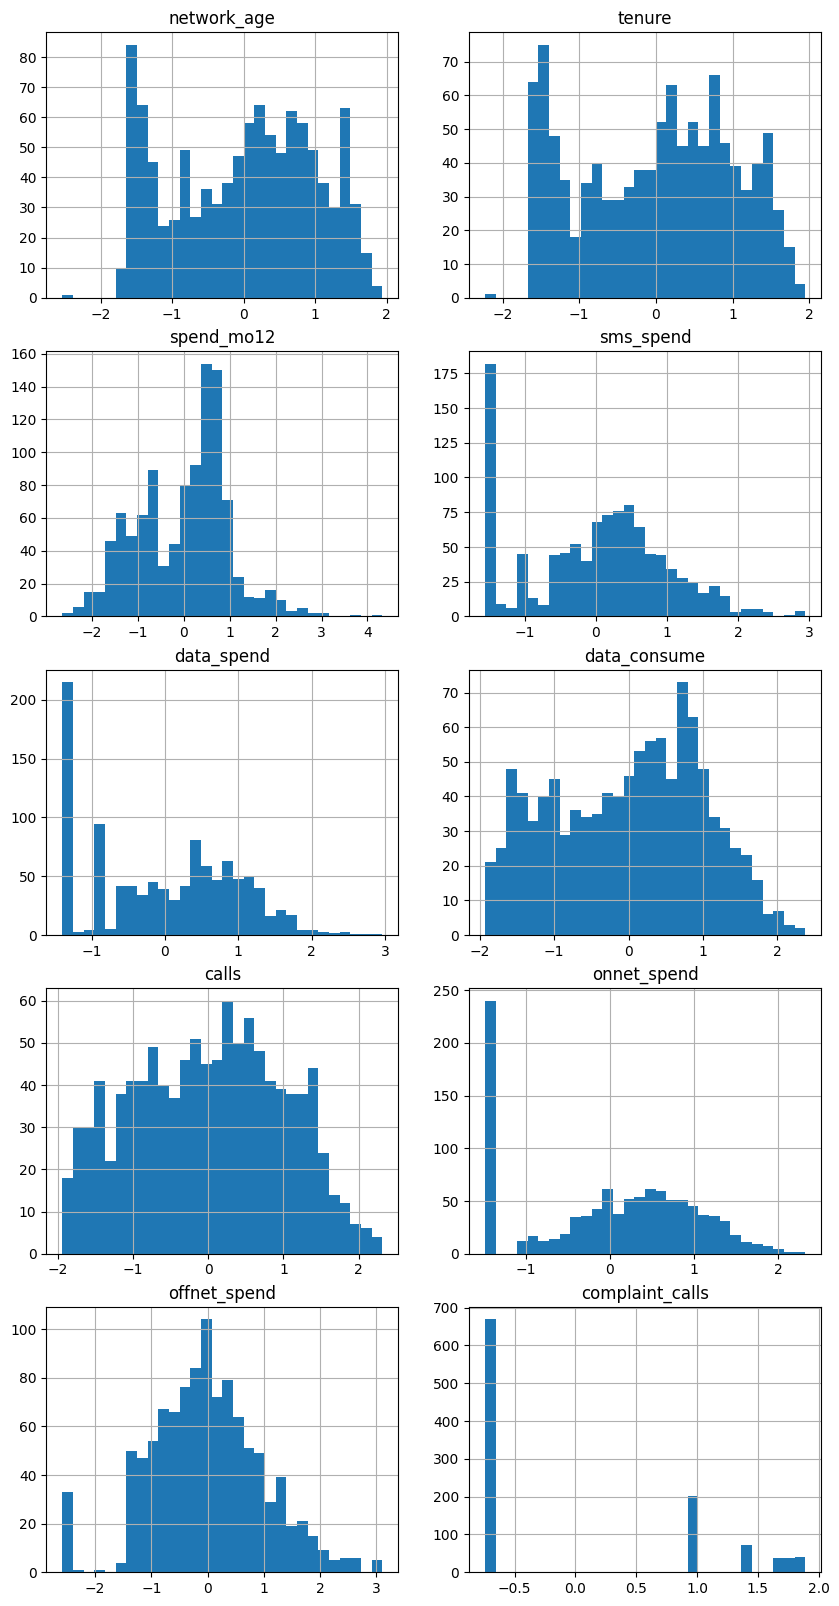

In [48]:
fig,ax = plt.subplots(5,2, figsize=(10,20))

for i,ax in enumerate(ax.flat):    
    ax.hist(data_num_scaled[:,i], bins=30)
    ax.set_title(numerical_features_simple_names[i])
    ax.grid()

In [49]:
pt.lambdas_ # Valor de las lambdas optimos para la transfomacion tipo Box-Cox

array([ 0.28822362,  0.26808458,  0.1410092 ,  0.05476686, -0.07100569,
        0.07254423,  0.0721175 ,  0.13864389,  0.13220487, -2.57138905])

* Mantenemos la variable numero de llamadas de queja `complaint_calls` sin transformar porque tiene una escala más manejable 
y porque puede ser muy informativa para predecir el abandono del cliente

In [50]:
data_c["complaint_calls"].max()

49

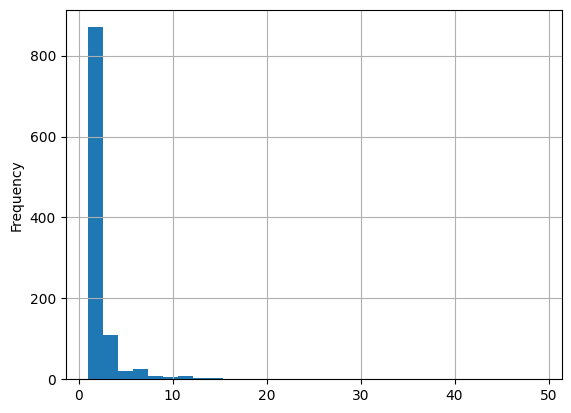

In [51]:
data_c["complaint_calls"].plot(kind="hist", bins=30)
plt.grid()

<AxesSubplot:>

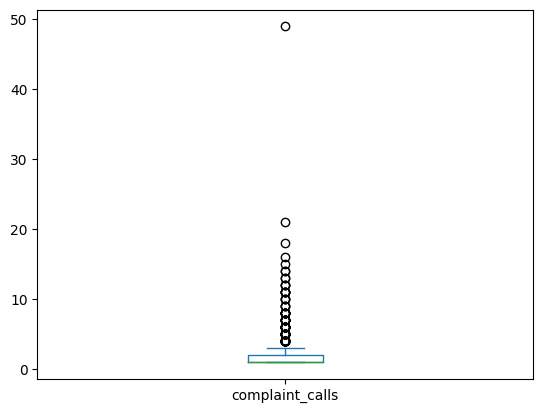

In [52]:
data_c["complaint_calls"].plot(kind="box") # Aunque la observacion maxima es susceptible también de ser filtrada

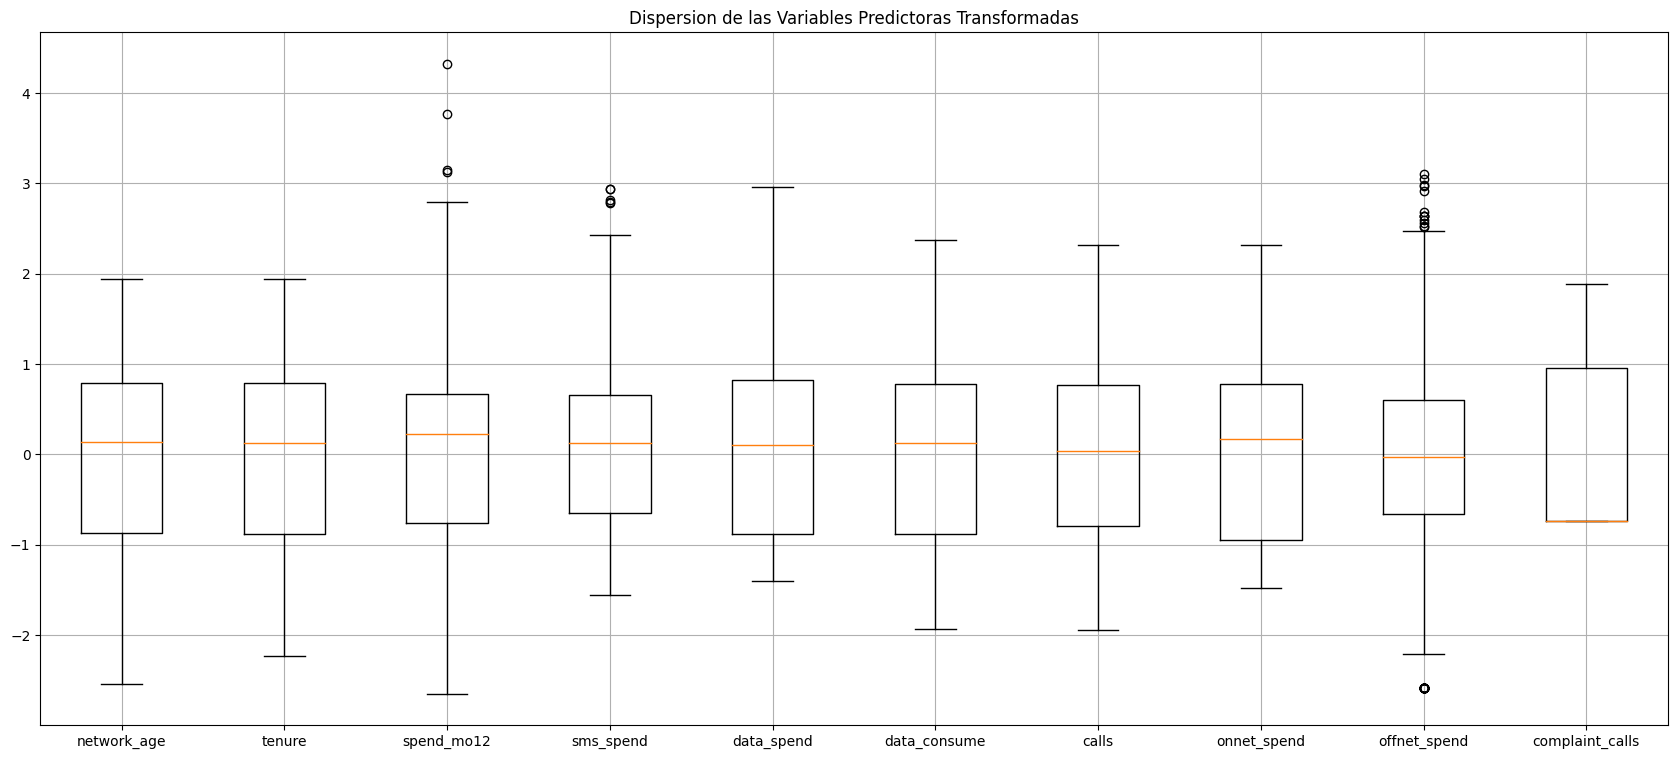

In [53]:
fig,ax = plt.subplots(figsize=(21,9))

ax.boxplot(
    data_num_scaled, 
    labels=numerical_features_simple_names,   
    )

ax.set_title("Dispersion de las Variables Predictoras Transformadas")
plt.grid()

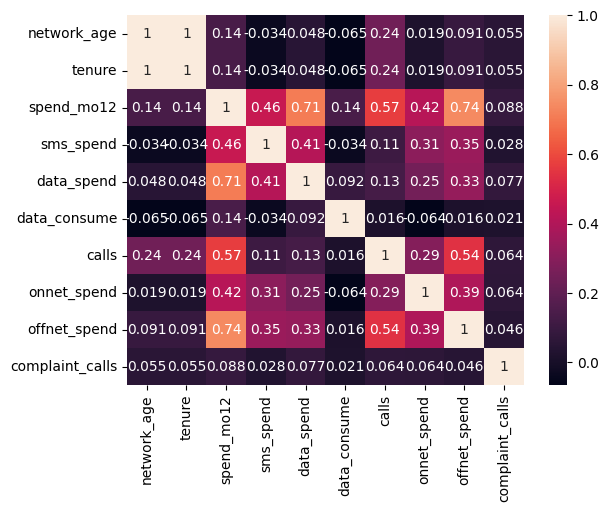

In [54]:
corr = data_c.iloc[:,:-1].corr()
sns.heatmap(corr, annot=True);

In [55]:
data_num_scaled_df = pd.DataFrame(
    data=data_num_scaled,
    columns=numerical_features_simple_names
)

In [56]:
data_num_scaled_df.isna().sum()

network_age        0
tenure             0
spend_mo12         0
sms_spend          0
data_spend         0
data_consume       0
calls              0
onnet_spend        0
offnet_spend       0
complaint_calls    0
dtype: int64

In [57]:
data_num_scaled_df.shape

(1056, 10)

<AxesSubplot:>

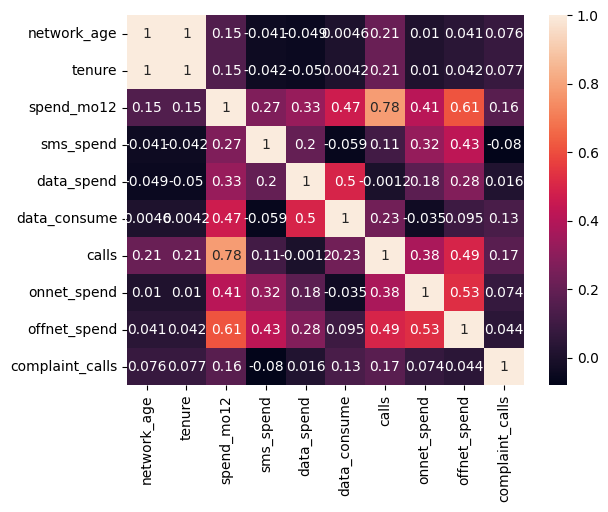

In [58]:
corr = data_num_scaled_df.corr()
sns.heatmap(corr,annot=True)

Es bastante evidente que hay fenómeno de multicolinealidad antes y después de transformar, 
por lo que un análisis basado en modelos lineales que relacionen características numéricas mediante `statmodels` y `vif`  nos puede reducir bastante la dimensionalidad.

In [59]:
%whos DataFrame

Variable             Type         Data/Info
-------------------------------------------
corr                 DataFrame                     network_<...>_calls         1.000000  
data                 DataFrame         Customer ID  network<...>n[1088 rows x 16 columns]
data_c               DataFrame         Customer ID  network<...>n[1056 rows x 16 columns]
data_num_scaled_df   DataFrame          network_age    tenu<...>n[1056 rows x 10 columns]


#### Análisis de la Multicolinealidad

In [60]:
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

##### a) `spend_mo12` frente a resto. Variables Transformadas


In [61]:
numerical_features_simple_names

['network_age',
 'tenure',
 'spend_mo12',
 'sms_spend',
 'data_spend',
 'data_consume',
 'calls',
 'onnet_spend',
 'offnet_spend',
 'complaint_calls']

In [62]:
right_formula_elements = [feature for feature in numerical_features_simple_names[3:-1]]
right_formula = " + ".join(right_formula_elements)
right_formula

'sms_spend + data_spend + data_consume + calls + onnet_spend + offnet_spend'

In [63]:
data_num_scaled_df.iloc[:,3:-1]

,sms_spend,data_spend,data_consume,calls,onnet_spend,offnet_spend
0,-1.557685,-0.883126,-1.830298,-0.927741,-0.149100,0.196404
1,-0.570872,-0.883126,-1.855024,-0.582082,0.210936,-0.003194
2,-0.652983,-0.883126,-1.701004,0.286941,0.985686,0.915269
3,-0.289471,1.376107,0.596724,-0.471347,0.493503,0.262404
4,0.587805,1.216874,0.090097,0.185308,0.821478,0.741122
...,...,...,...,...,...,...
1051,-0.288663,-1.399162,-0.772012,0.327633,1.526573,0.323278
1052,-0.651597,-0.614223,-0.184386,1.429066,1.008006,0.877585
1053,-0.104317,-0.614223,0.078571,0.691456,1.648018,1.103960
1054,1.246743,-0.022224,-1.191871,0.191376,1.342017,0.309682


In [64]:
modelo = sm.ols(
    formula= "spend_mo12 ~ "+right_formula,
    data=data_num_scaled_df.iloc[:,2:-1]
)


In [65]:
res = modelo.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             spend_mo12   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     672.3
Date:                Wed, 22 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:07:30   Log-Likelihood:                -665.19
No. Observations:                1056   AIC:                             1344.
Df Residuals:                    1049   BIC:                             1379.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.027e-16      0.014   2.16e-14      1.000      -0.028       0.028
sms_spend        0.1020      0.016      6.387      0.000       0.071       0.133
data_spend       0.1217      0.018      6.735      0.000       0.086       0.157
data_consume     0.2540      0.018     14.309      0.000       0.219       0.289
calls            0.6045      0.018     33.638      0.000       0.569       0.640
onnet_spend      0.0345      0.017      2.003      0.045       0.001       0.068
offnet_spend     0.1951      0.020      9.933      0.000       0.157       0.234
==============================================================================
Omnibus:                       46.885   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.343
Skew:                           0.330   Prob(JB):                     7.99e-19
Kurtosis:                       4.208   Cond. No.                         2.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
univ_model = sm.ols(
    formula="spend_mo12 ~ calls",
    data = data_num_scaled_df[["spend_mo12","calls"]]
)

In [160]:
res_univ = univ_model.fit()
res_univ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             spend_mo12   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     1681.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):          1.94e-220
Time:                        11:55:00   Log-Likelihood:                -995.00
No. Observations:                1056   AIC:                             1994.
Df Residuals:                    1054   BIC:                             2004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.027e-16      0.019   1.58e-14      1.000      -0.038       0.038
calls          0.7839      0.019     40.996      0.000       0.746       0.821
==============================================================================
Omnibus:                       54.559   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.389
Skew:                           0.365   Prob(JB):                     9.63e-23
Kurtosis:                       4.331   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
data_num_scaled_df

,network_age,tenure,spend_mo12,sms_spend,data_spend,data_consume,calls,onnet_spend,offnet_spend,complaint_calls
0,-1.544683,-1.534423,-1.283380,-1.557685,-0.883126,-1.830298,-0.927741,-0.149100,0.196404,0.961497
1,0.177906,0.175552,-1.121649,-0.570872,-0.883126,-1.855024,-0.582082,0.210936,-0.003194,-0.742896
2,0.829493,0.832189,-0.170948,-0.652983,-0.883126,-1.701004,0.286941,0.985686,0.915269,-0.742896
3,0.721025,0.723107,0.150646,-0.289471,1.376107,0.596724,-0.471347,0.493503,0.262404,-0.742896
4,-1.413553,-1.411402,0.456210,0.587805,1.216874,0.090097,0.185308,0.821478,0.741122,-0.742896
...,...,...,...,...,...,...,...,...,...,...
1051,1.492444,1.496285,0.469379,-0.288663,-1.399162,-0.772012,0.327633,1.526573,0.323278,0.961497
1052,-0.365236,-0.373151,0.495983,-0.651597,-0.614223,-0.184386,1.429066,1.008006,0.877585,1.814997
1053,1.099977,1.103659,0.500219,-0.104317,-0.614223,0.078571,0.691456,1.648018,1.103960,1.446627
1054,-0.534610,-0.544197,0.507457,1.246743,-0.022224,-1.191871,0.191376,1.342017,0.309682,-0.742896


In [67]:
vif = pd.DataFrame()
subset = data_num_scaled_df.loc[:,[feature for feature in data_num_scaled_df.columns if feature not in ["network_age","tenure"]]]
vif['VIF'] = [variance_inflation_factor(exog=subset.values, exog_idx=i) for i in range(subset.shape[1])]
vif['variable'] = subset.columns
vif

,VIF,variable
0,4.860893,spend_mo12
1,1.359210,sms_spend
2,1.733517,data_spend
3,1.920373,data_consume
4,3.416586,calls
5,1.521080,onnet_spend
6,2.147484,offnet_spend
7,1.055009,complaint_calls


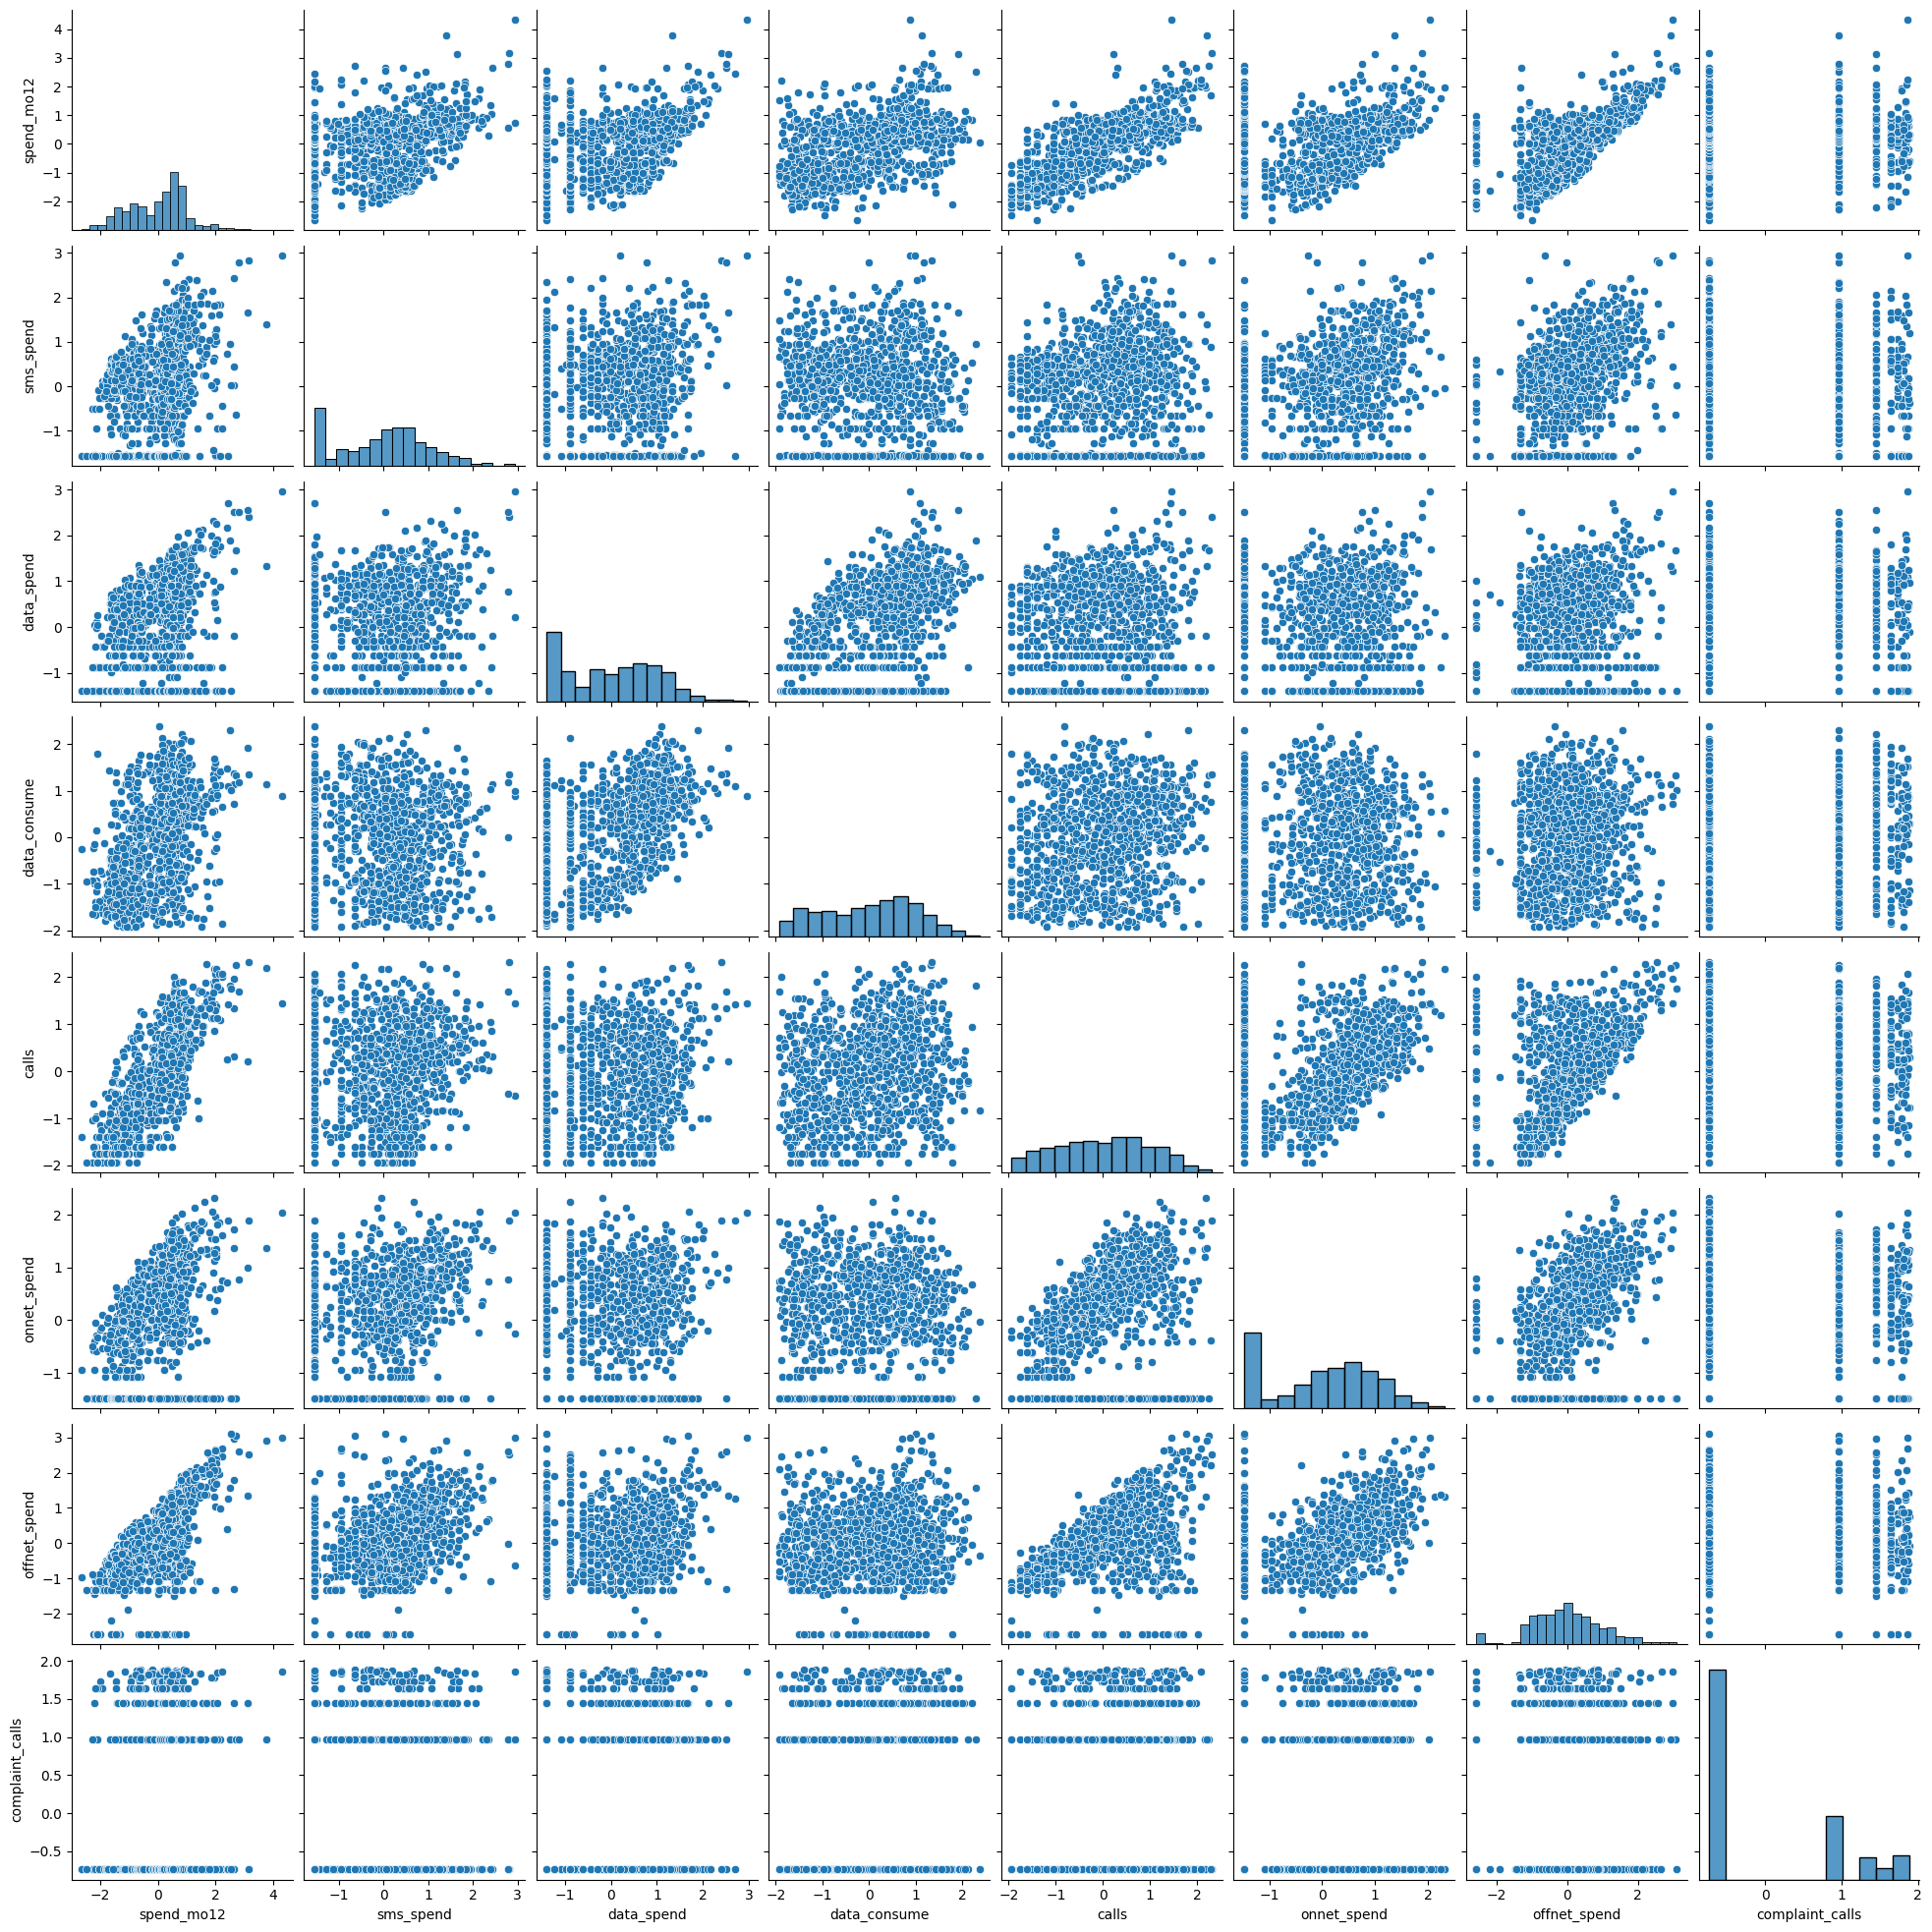

In [68]:
sns.pairplot(subset)
plt.show()

`spend_mo12` está muy bien explicada por el resto de variables a la vista de la determinación de la regresión y el coeficiente de inflación de la varianza. Por lo cual es descartable ya a nivel lineal.

##### b) `calls` frente a `offnet_spend` y `onnet_spend`

In [69]:
reduced_set_numerical_features = ["calls","offnet_spend","onnet_spend"]

calls_reg = sm.ols(
    formula = "calls~offnet_spend + onnet_spend",
    data = data_num_scaled_df[reduced_set_numerical_features]
)
res_calls = calls_reg.fit()
res_calls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  calls   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     187.3
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           2.52e-70
Time:                        10:09:59   Log-Likelihood:                -1337.7
No. Observations:                1056   AIC:                             2681.
Df Residuals:                    1053   BIC:                             2696.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.683e-16      0.026   6.36e-15      1.000      -0.052       0.052
offnet_spend     0.4106      0.031     13.186      0.000       0.349       0.472
onnet_spend      0.1587      0.031      5.096      0.000       0.098       0.220
==============================================================================
Omnibus:                      121.757   Durbin-Watson:                   1.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.169
Skew:                           0.943   Prob(JB):                     3.70e-36
Kurtosis:                       3.386   Cond. No.                         1.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
vif = pd.DataFrame()
subset = data_num_scaled_df.loc[:,reduced_set_numerical_features]
vif['VIF'] = [variance_inflation_factor(exog=subset.values, exog_idx=i) for i in range(subset.shape[1])]
vif['variable'] = subset.columns
vif

,VIF,variable
0,1.355781,calls
1,1.612787,offnet_spend
2,1.418358,onnet_spend


No podemos decir lo mismo de `calls` por lo que la mantendremos (aunque intuitivamente se aprecie que correlaciona linealmente con `onnet_spend`, el coeficiente de inflación de la varianza no es claro)

##### c) Análisis de Sensibilidad a la transformacion `PowerTransform`

¿Qué ocurre si no transformamos las variables numéricas?

In [70]:
%whos list

Variable                            Type    Data/Info
-----------------------------------------------------
categorical_features                list    n=4
categorical_features_simple_names   list    n=4
numerical_features                  list    n=10
numerical_features_simple_names     list    n=10
reduced_set_numerical_features      list    n=3
right_formula_elements              list    n=6


In [71]:
right_formula = " + ".join(
    [features for features in numerical_features_simple_names[3:-1]]
)

num_subset = data_c.loc[:,[features for features in numerical_features_simple_names[2:-1]]]

In [72]:
untransformed_ols = sm.ols(
    formula="spend_mo12 ~ " + right_formula,
    data=num_subset
)

In [180]:
untransformed_result = untransformed_ols.fit()
untransformed_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             spend_mo12   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1044.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:02:34   Log-Likelihood:                -8057.9
No. Observations:                1056   AIC:                         1.613e+04
Df Residuals:                    1049   BIC:                         1.616e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       98.7148     20.943      4.713      0.000      57.619     139.810
sms_spend        1.9065      0.302      6.323      0.000       1.315       2.498
data_spend       1.9782      0.053     37.130      0.000       1.874       2.083
data_consume  1.613e-05   2.15e-06      7.513      0.000    1.19e-05    2.03e-05
calls            1.2487      0.062     20.099      0.000       1.127       1.371
onnet_spend      0.0053      0.002      3.387      0.001       0.002       0.008
offnet_spend     0.0132      0.001     24.100      0.000       0.012       0.014
==============================================================================
Omnibus:                     1431.998   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           673657.638
Skew:                           6.962   Prob(JB):                         0.00
Kurtosis:                     125.949   Cond. No.                     1.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Si analizamos el coeficiente de inflación de la varianza (`VIF`), se aprecia claramente que, de nuevo, `spend_mo12` puede ser redundante, incluso para datos sin transformar

In [189]:
vif = pd.DataFrame()
subset = data_c.loc[:,numerical_features_simple_names[2:-1]]
vif['VIF'] = [variance_inflation_factor(exog=subset.values, exog_idx=i) for i in range(subset.shape[1])]
vif['variable'] = subset.columns
vif

,VIF,variable
0,9.445522,spend_mo12
1,1.635306,sms_spend
2,3.026350,data_spend
3,1.127090,data_consume
4,2.752030,calls
5,1.578079,onnet_spend
6,3.132155,offnet_spend


Si la descartamos como variable predictora o explicativa, tenemos

In [190]:
vif = pd.DataFrame()
subset = data_c.loc[:,numerical_features_simple_names[3:-1]]
vif['VIF'] = [variance_inflation_factor(exog=subset.values, exog_idx=i) for i in range(subset.shape[1])]
vif['variable'] = subset.columns
vif

,VIF,variable
0,1.540174,sms_spend
1,1.334211,data_spend
2,1.047229,data_consume
3,1.805092,calls
4,1.549476,onnet_spend
5,2.050194,offnet_spend


Que regulariza suficientementemente los `VIF`s

#### 3.3 Codificacion Variables Categóricas

##### a) Estudio Simplificación de Variables Categóricas

In [46]:
data_c.rename(
    columns=renamer_dict,
    inplace=True
)
data_c.columns

Index(['Customer ID', 'network_age', 'tenure', 'spend_mo12', 'sms_spend',
       'data_spend', 'data_consume', 'calls', 'onnet_spend', 'offnet_spend',
       'complaint_calls', 'net_type_mo1', 'net_type_mo2', 'competitor_mo1',
       'competitor_mo2', 'Churn Status'],
      dtype='object')

In [47]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
data       DataFrame         Customer ID  network<...>n[1088 rows x 16 columns]
data_c     DataFrame         Customer ID  network<...>n[1056 rows x 16 columns]


In [75]:
categorical_features_simple_names

['net_type_mo1', 'net_type_mo2', 'competitor_mo1', 'competitor_mo2']

In [48]:
data_c[categorical_features_simple_names].value_counts(subset=["net_type_mo1","net_type_mo2"])

net_type_mo1  net_type_mo2
3G            3G              561
2G            2G              248
Other         Other           168
2G            3G               49
3G            2G               30
dtype: int64

In [49]:
top3_competitors = data_c["competitor_mo2"].value_counts().index[:3].tolist()
top3_competitors

['Uxaa', 'PQza', 'Mango']

In [50]:
subset_top3_competitors = data_c["competitor_mo2"].isin(top3_competitors)
subset_top3_competitors

0       True
1       True
2       True
4       True
5       True
        ... 
1106    True
1107    True
1108    True
1109    True
1110    True
Name: competitor_mo2, Length: 1056, dtype: bool

In [51]:
data_c.loc[~subset_top3_competitors]["Churn Status"].value_counts()

1    82
0    36
Name: Churn Status, dtype: int64

In [52]:
data_c["Churn Status"].value_counts()

0    538
1    518
Name: Churn Status, dtype: int64

In [81]:
data_c[numerical_features_simple_names]

,network_age,tenure,spend_mo12,sms_spend,data_spend,data_consume,calls,onnet_spend,offnet_spend,complaint_calls
0,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2
1,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1
2,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1
4,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1
5,158,5.27,792.1144,28.63,108.75,107713.5820,101,7296,16636,1
...,...,...,...,...,...,...,...,...,...,...
1106,3994,133.13,804.0848,7.00,0.00,2364.6768,127,30071,8091,2
1107,731,24.37,828.7404,3.52,2.50,35674.9864,660,10912,20756,7
1108,2971,99.03,832.7248,9.62,2.50,103008.5605,224,37401,29553,3
1109,595,19.83,839.5724,73.80,8.75,229.4463,102,21304,7894,1


In [82]:
data_c["Churn Status"].value_counts()

0    538
1    518
Name: Churn Status, dtype: int64

**Conclusiones**

Recodificar con variables categóricas construídas adhoc a partir de las originales, no parece que aporte valor alguno para separar entre clases:

1. Una variable categórica que separe entre las 3 compañías más preferidas por los clientes y las 3 menos preferidas "es neutral" para la clasificación en el último mes
2. Asimismo, una variable categórica que mida si hay cambio de tipo de suscripción o permanencia tampoco para aportar discriminación entre clases

In [53]:
permanencia = data_c["net_type_mo1"] == data_c["net_type_mo2"]
migracion = ~permanencia

In [54]:
data_c[migracion]["Churn Status"].value_counts()

1    52
0    27
Name: Churn Status, dtype: int64

In [60]:
data_c["Churn Status"] = data_c["Churn Status"].astype("int8")

In [64]:
data_c.select_dtypes("int64")

,network_age,calls,onnet_spend,offnet_spend,complaint_calls
0,123,14,564,6408,2
1,1316,27,1626,4373,1
2,2385,119,10411,22039,1
4,2175,33,3387,7241,1
5,158,101,7296,16636,1
...,...,...,...,...,...
1106,3994,127,30071,8091,2
1107,731,660,10912,20756,7
1108,2971,224,37401,29553,3
1109,595,102,21304,7894,1


In [86]:
data_c.columns

Index(['Customer ID', 'network_age', 'tenure', 'spend_mo12', 'sms_spend',
       'data_spend', 'data_consume', 'calls', 'onnet_spend', 'offnet_spend',
       'complaint_calls', 'net_type_mo1', 'net_type_mo2', 'competitor_mo1',
       'competitor_mo2', 'Churn Status'],
      dtype='object')

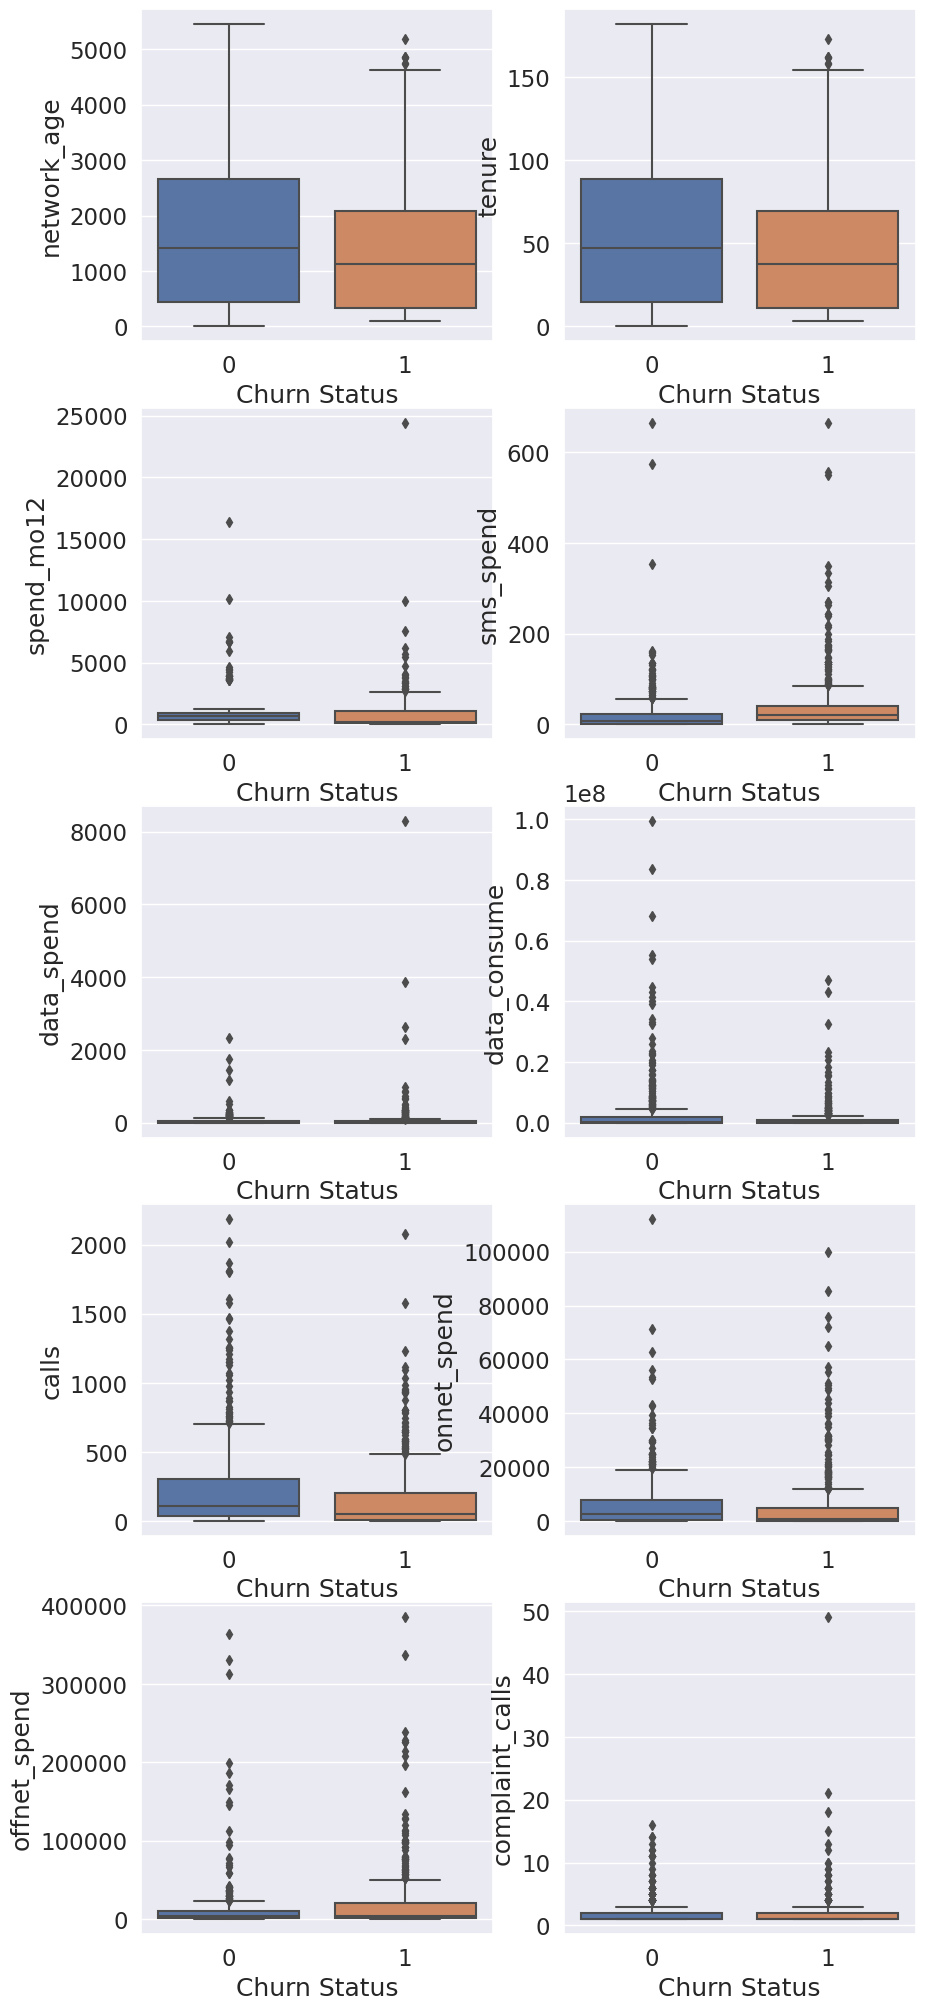

In [65]:
sns.set(style="darkgrid", font_scale=1.5)
plt.subplots(figsize = (10,25))

for i,feature in enumerate(numerical_features_simple_names):
    plt.subplot(5,2,i+1)
    sns.boxplot(x='Churn Status', y=feature, data=data_c)
    
plt.show()


In [71]:
# Dumping Cleaned/Imputed Data For Later Use
data_c.to_csv(
    "./cleaned_telcom_churn_construction.csv",
    index=False
)

### 4 Modelado

#### 4.1 Variables Categoricas Irrelevantes?

In [120]:
%whos DataFrame

Variable             Type         Data/Info
-------------------------------------------
corr                 DataFrame                     network_<...>_calls         1.000000  
data                 DataFrame         Customer ID  network<...>n[1088 rows x 16 columns]
data_c               DataFrame         Customer ID  network<...>n[1056 rows x 16 columns]
data_num_scaled_df   DataFrame          network_age    tenu<...>n[1056 rows x 10 columns]
num_subset           DataFrame          spend_mo12  sms_spe<...>\n[1056 rows x 7 columns]
subset               DataFrame          spend_mo12  sms_spe<...>\n[1056 rows x 8 columns]
vif                  DataFrame            VIF         varia<...>1.055009  complaint_calls


In [44]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 0 to 1110
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Customer ID                                  1056 non-null   object 
 1   network_age                                  1056 non-null   int64  
 2   tenure                                       1056 non-null   float64
 3   spend_mo12                                   1056 non-null   float64
 4   sms_spend                                    1056 non-null   float64
 5   data_spend                                   1056 non-null   float64
 6   data_consume                                 1056 non-null   float64
 7   calls                                        1056 non-null   int64  
 8   onnet_spend                                  1056 non-null   int64  
 9   offnet_spend                                 1056 non-null   int64  
 10  

* Omisión de variables **poco relevantes** _a priori_ (todas las categoricas y las redundantes o no informativas)

In [123]:
(data_c.dtypes!=object) # Boolean Excluding Categorical

Customer ID        False
network_age         True
tenure              True
spend_mo12          True
sms_spend           True
data_spend          True
data_consume        True
calls               True
onnet_spend         True
offnet_spend        True
complaint_calls     True
net_type_mo1       False
net_type_mo2       False
competitor_mo1     False
competitor_mo2     False
Churn Status        True
dtype: bool

In [45]:
data_c.select_dtypes("number")

,network_age,tenure,spend_mo12,sms_spend,data_spend,data_consume,calls,onnet_spend,offnet_spend,complaint_calls,Churn Status
0,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,0
1,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,0
2,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,0
4,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,0
5,158,5.27,792.1144,28.63,108.75,107713.5820,101,7296,16636,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1106,3994,133.13,804.0848,7.00,0.00,2364.6768,127,30071,8091,2,0
1107,731,24.37,828.7404,3.52,2.50,35674.9864,660,10912,20756,7,0
1108,2971,99.03,832.7248,9.62,2.50,103008.5605,224,37401,29553,3,0
1109,595,19.83,839.5724,73.80,8.75,229.4463,102,21304,7894,1,0


In [227]:
X.head()
# Excluding Redundant or Explained by the Other Predictors `network_age`, `spend_mo12

,Customer ID,tenure,sms_spend,data_spend,data_consume,calls,onnet_spend,offnet_spend,complaint_calls,net_type_mo1,net_type_mo2,competitor_mo1,competitor_mo2
0,ADF0039,4.10,0.00,1.25,1.4951,14,564,6408,2,2G,2G,Uxaa,Mango
1,ADF0041,43.87,4.14,1.25,1.0244,27,1626,4373,1,2G,2G,Uxaa,Mango
2,ADF0051,79.50,3.51,1.25,6.0898,119,10411,22039,1,2G,2G,Weematel,Mango
4,ADF0060,72.50,6.99,153.75,673204.0342,33,3387,7241,1,2G,3G,Weematel,Mango
5,ADF0066,5.27,28.63,108.75,107713.5820,101,7296,16636,1,2G,2G,Uxaa,Mango


In [173]:
X = X.drop(
    columns=[
        "network_age",
        "spend_mo12",
        "Churn Status"
    ]
)

In [174]:
X.head()

,Customer ID,tenure,sms_spend,data_spend,data_consume,calls,onnet_spend,offnet_spend,complaint_calls,net_type_mo1,net_type_mo2,competitor_mo1,competitor_mo2
0,ADF0039,4.10,0.00,1.25,1.4951,14,564,6408,2,2G,2G,Uxaa,Mango
1,ADF0041,43.87,4.14,1.25,1.0244,27,1626,4373,1,2G,2G,Uxaa,Mango
2,ADF0051,79.50,3.51,1.25,6.0898,119,10411,22039,1,2G,2G,Weematel,Mango
4,ADF0060,72.50,6.99,153.75,673204.0342,33,3387,7241,1,2G,3G,Weematel,Mango
5,ADF0066,5.27,28.63,108.75,107713.5820,101,7296,16636,1,2G,2G,Uxaa,Mango


In [175]:
X.isna().sum()

Customer ID        0
tenure             0
sms_spend          0
data_spend         0
data_consume       0
calls              0
onnet_spend        0
offnet_spend       0
complaint_calls    0
net_type_mo1       0
net_type_mo2       0
competitor_mo1     0
competitor_mo2     0
dtype: int64

In [176]:
y = data_c["Churn Status"]

In [177]:
y.value_counts() # Well-Balanced

0    538
1    518
Name: Churn Status, dtype: int64

In [280]:
X["complaint_calls"] = X["complaint_calls"].apply(lambda x: 1 if x>1 else 0) # Binning

In [281]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.25,
    random_state=42
)

In [282]:
print(X_train.columns.tolist())

['Customer ID', 'tenure', 'sms_spend', 'data_spend', 'data_consume', 'calls', 'onnet_spend', 'offnet_spend', 'complaint_calls', 'net_type_mo1', 'net_type_mo2', 'competitor_mo1', 'competitor_mo2']


In [283]:
num_features_totransform = X.columns[(X.dtypes!=object).values.tolist()].tolist()[:-1]
cat_features_tocode = X.columns[(X.dtypes==object).values.tolist()].tolist()[1:]

print(num_features_totransform)
print(cat_features_tocode)

['tenure', 'sms_spend', 'data_spend', 'data_consume', 'calls', 'onnet_spend', 'offnet_spend']
['net_type_mo1', 'net_type_mo2', 'competitor_mo1', 'competitor_mo2']


In [284]:
""" 
Variables Mixtas, Requieren Transfomers Mixtos -> ColumnTransformer() es capaz de combinar diferentes
transformaciones de una manera heterogenea y muy flexible
"""
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer, StandardScaler, RobustScaler
#ct = ColumnTransformer()

In [285]:
ct = ColumnTransformer(
    [        
        ("discards", "drop", ["Customer ID"]),
        ("num_preprocess", PowerTransformer(), num_features_totransform), # tipo Box-Cox         
        # ("num_preprocess", RobustScaler(), num_features_totransform), # Robust (Outliers Influence)
        # ("num_preprocess", "passthrough", num_features_totransform), # pass        
        ("pass", "passthrough", ["complaint_calls"]),  # pass "complaint_calls" (AS IS)
        ("cat_preprocess", "drop", cat_features_tocode)
        #("cat_preprocess", OneHotEncoder(drop="first"), cat_features_tocode)
    ]
)

X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

In [286]:
# Check Features Considered
X_train_scaled.shape

(792, 8)

In [344]:
# Double check
X_train_scaled[:5,:]

array([[ 1.40449441,  2.98299588,  2.82557665,  0.89049048,  1.41573591,
         2.01187846,  3.00414252,  1.        ],
       [ 0.21601996,  0.46162133,  0.58358492,  0.70578655, -0.24837528,
         0.23285213,  0.52031272,  0.        ],
       [ 0.16840224, -1.29956517,  0.76412389,  1.3142381 , -0.06909624,
        -0.33605341,  0.50906815,  1.        ],
       [-1.46906783,  1.07457869,  0.76412389, -0.31248948,  1.27949072,
         1.71712412,  1.55985904,  0.        ],
       [-0.29023922,  0.49732922,  0.53313583, -0.05638282,  0.29731409,
         0.83627642,  1.28036861,  0.        ]])

#### 4.2 <u>Baseline Modeling:</u> mediante **Pipelines**

In [350]:

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

# Construct some pipelines
pipe_lr = Pipeline([('scl', ct),
			#('pca', PCA(n_components=5)),
			('clf', LogisticRegression(random_state=42))])

pipe_svm = Pipeline([('scl', ct),
			#('pca', PCA(n_components=5)),
			('clf', svm.SVC(random_state=42))])
			
pipe_dt = Pipeline([('scl', ct),
			#('pca', PCA(n_components=5)),
			('clf', tree.DecisionTreeClassifier(random_state=42))])

# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_svm, pipe_dt]
			
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Decision Tree'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

# Compare accuracies
for idx, val in enumerate(pipelines):
	print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

# Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(X_test, y_test) > best_acc:
		best_acc = val.score(X_test, y_test)
		best_pipe = val
		best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

# Save pipeline to file
""" joblib.dump(best_pipe, 'best_pipeline.pkl', compress=1)
print('Saved %s pipeline to file' % pipe_dict[best_clf]) """

Logistic Regression pipeline test accuracy: 0.712
Support Vector Machine pipeline test accuracy: 0.723
Decision Tree pipeline test accuracy: 0.670
Classifier with best accuracy: Support Vector Machine


" joblib.dump(best_pipe, 'best_pipeline.pkl', compress=1)\nprint('Saved %s pipeline to file' % pipe_dict[best_clf]) "

La SVM para clasificacion como estimador debil sin tuneo de hiperparámetros: da el mejor resultado por lo que podría ser también un buen candidato para clasificación por agregación de modelos (bien sea `bagging` o `boosting`). También se puede combinar diferentes modelos mediante `stacking` (modelos distintos con bootstrap de las muestras)

In [351]:
best_pipe # Esquema detallado del mejor estimador elemental con preproceso previo. PCA() no parece tener un efecto significativo sobre les resultados.

Pipeline(steps=[('scl',
                 ColumnTransformer(transformers=[('discards', 'drop',
                                                  ['Customer ID']),
                                                 ('num_preprocess',
                                                  PowerTransformer(),
                                                  ['tenure', 'sms_spend',
                                                   'data_spend', 'data_consume',
                                                   'calls', 'onnet_spend',
                                                   'offnet_spend']),
                                                 ('pass', 'passthrough',
                                                  ['complaint_calls']),
                                                 ('cat_preprocess', 'drop',
                                                  ['net_type_mo1',
                                                   'net_type_mo2',
                                              

Es importante reseñar que los métodos que actúan sobre el Pipe para estimar modelo `.fit`, aplican `fit_transform()` para el escalado de variables originales, mientras que los métodos para predecir (`.predict()`,`.score()`, etc) únicamente transforman vía `.transform()`

![Esquema de métodos con Pipelines de `sklearn`](https://i.stack.imgur.com/uR1Wt.png)

#### 4.3 <u>Ensembles</u>:

##### 4.3.1 Bootstrap Aggregation (Bagging): `Random Forest`

Dado que un estimador débil como el árbol de decisión ha dado unos resultados insuficientes aunque alentadores, podemos estudiar si la agregación (vía `Boosting`, `Bagging` o `Stacking`) de éstos supone una mejora en los resultados para el conjunto de test. Empezamos por bosques aleatorios, dado que su implementación es la más directa

_a) Direct Search_

In [352]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
run_gs = True

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 5, 6],
                 'n_estimators': [100, 50, 10],
                 'max_features': ['sqrt'],
                 'min_samples_split': [3, 10, 20],
                 'min_samples_leaf': [1, 2, 3, 4]
    }
    
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(
        forest,
        scoring='accuracy',
        param_grid=parameter_grid,
        cv=cross_validation,
        verbose=1
    )

    grid_search.fit(X_train_scaled,y_train)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 20, 'max_features': 'sqrt', 'max_depth': 5}
    
    model = RandomForestClassifier(**parameters)
    model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best score: 0.7777645091951279
Best parameters: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 100}


In [353]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 100}

In [354]:
# Refitting
model = RandomForestClassifier(**grid_search.best_params_)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=3)

In [355]:
grid_search.best_score_

0.7777645091951279

In [356]:
model.score(X_train_scaled, y_train)

0.8674242424242424

In [357]:
model.score(X_test_scaled, y_test)

0.7045454545454546

**<u>Evaluation Metrics</u>**

Análisis más detallado de métricas dado que por ser un problema de clasificación binario se puede hacer más extenso.

In [358]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score


* Cálculo de métricas en <u>conjunto de entrenamiento</u>:

In [359]:

pred_train = model.predict(X_train_scaled)
confusion_matrix(y_train, pred_train)

array([[370,  36],
       [ 69, 317]])

In [360]:
accuracy_score(y_train, pred_train)

0.8674242424242424

In [361]:
roc_auc_score(y_train, pred_train)

0.8662867862885729

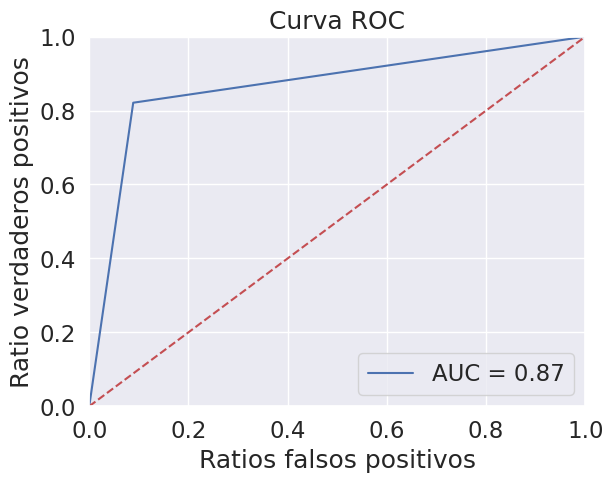

In [362]:
fpr, tpr, threshold = roc_curve(y_train, pred_train)
roc_auc = roc_auc_score(y_train, pred_train)

plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Ratio verdaderos positivos')
plt.xlabel('Ratios falsos positivos')
plt.show()

In [363]:
def roc_auc_results(actual, predicted):
    fpr, tpr, threshold = roc_curve(actual, predicted)
    roc_auc = roc_auc_score(actual, predicted)

    plt.title('Curva ROC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Ratio verdaderos positivos')
    plt.xlabel('Ratios falsos positivos')
    plt.show()

    print(f"Area Under the Curve (the Closer to 1, the Better): {100*roc_auc:.1f}%")
    

* Cálculo de métricas en <u>conjunto de test</u>:

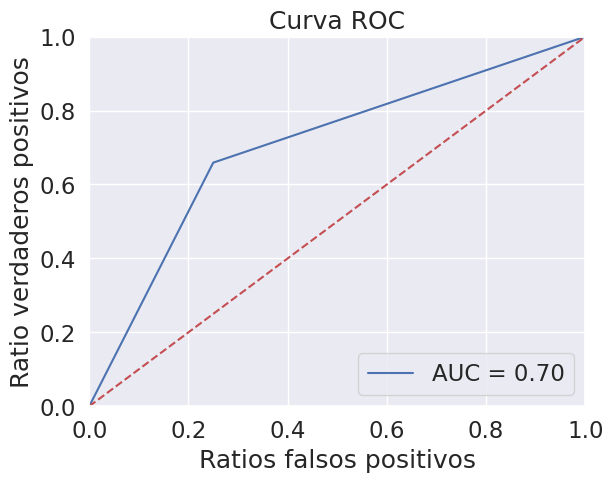

Area Under the Curve (the Closer to 1, the Better): 70.5%


In [364]:
pred_test = model.predict(X_test_scaled)
roc_auc_results(y_test, pred_test)

_b) Random Search_

In [365]:
from sklearn.model_selection import RandomizedSearchCV
from  scipy.stats import uniform, truncnorm, randint # Para generar la nube de params aleatoria a seleccionar

In [366]:

param_distributions = [
    {
        'max_features': truncnorm(a=0, b=1, loc=0.5, scale=0.25),
        'max_depth' : randint(5,20),
        'n_estimators': randint(10,200),        
        'min_samples_split': uniform(0.01,0.199),
        'min_samples_leaf': randint(1,10)
    },    
]

rf_model = RandomForestClassifier()
clf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,
    cv=StratifiedKFold(),  # Validacion Estratificada (preservando proporción de clases) basada en 5 Folds
    scoring="accuracy",
    refit=True,
    random_state=42
)

model = clf.fit(X_train_scaled, y_train)

In [316]:
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 11,
 'max_features': 0.5086507173903149,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 0.016254407951660117,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 61,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [317]:
clf.best_score_

0.7651222036462066

In [318]:
best_RFmodel = model.best_estimator_
train_score = best_RFmodel.score(X_train_scaled, y_train)
test_score = best_RFmodel.score(X_test_scaled, y_test)  

In [319]:
print(f"Score en Conjunto Entrenamiento: {100*train_score:.1f}%")
print(f"Score en Conjunto Test: {100*test_score:.1f}%")


Score en Conjunto Entrenamiento: 91.2%
Score en Conjunto Test: 70.8%


In [320]:
np.ceil(best_RFmodel.get_params()["max_features"]*X_train_scaled.shape[1]) # Consistent With Grid Search

5.0

In [321]:
np.ceil(best_RFmodel.get_params()["min_samples_split"]*X_train_scaled.shape[0])

13.0

In [322]:
# GS Refinements based on Randomized Search CV
fine_tuning_gs_params = {
    "max_depth": [10,11,12],            # Refinamos en la cercania de 8
    "max_features": [4,5,6],         # Refinamos en la cercania de 5
    "min_samples_leaf": [2,3,4],     # Refinamos en la cercania de 4
    "min_samples_split": [12,13,14], # Refinamos en la cercania del 11
    "n_estimators": [55,61,65]    # Idem
}

fine_tuned_forest = RandomForestClassifier()

grid_search = GridSearchCV(
        fine_tuned_forest,
        scoring='accuracy',
        param_grid=fine_tuning_gs_params,
        cv=StratifiedKFold(),
        verbose=1,
        refit=True,
        n_jobs=-1
)

grid_search.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [12, 13, 14],
                         'n_estimators': [55, 61, 65]},
             scoring='accuracy', verbose=1)

In [323]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=2,
                       min_samples_split=14, n_estimators=61)

In [324]:
grid_search.best_score_

0.7676538492158269

In [325]:
grid_search.score(X_train_scaled, y_train)

0.9103535353535354

In [326]:
grid_search.score(X_test_scaled, y_test)

0.7196969696969697

In [327]:
df_finetuned_gs = pd.DataFrame(grid_search.cv_results_)

In [333]:
 params = [fields for fields in df_finetuned_gs.columns if "param_" in fields]

In [332]:
params

['param_max_depth',
 'param_max_features',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'param_n_estimators',
 'params']

In [336]:
df_finetuned_gs.sort_values(by=["rank_test_score"])[params+["rank_test_score"]].head(5)

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,rank_test_score
34,10,5,2,14,61,1
96,11,4,3,14,55,2
108,11,5,2,12,55,3
8,10,4,2,14,65,4
217,12,6,2,12,61,4


**Conclusiones**: La mejora por refinamiento del la busqueda aleatorizada es marginal y no se traslada a una mejora sustancial
en conjunto de test.

In [337]:
pred_test = grid_search.best_estimator_.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       132
           1       0.75      0.66      0.70       132

    accuracy                           0.72       264
   macro avg       0.72      0.72      0.72       264
weighted avg       0.72      0.72      0.72       264



#### 4.3.2 Otros Bagging: BaggingClassifier de `LogisticRegression()` y `SVC()`

Vamos a tratar de mejorar nuestros resultados mediante conjuntos de estimadores débiles distintos a los árboles de decisión.

La evaluación `baseline` que hemos hecho de modelos simples sin tuneo de hiperparámetros nos da idea que un `ensemble` basado en Máquinas Vector Soporte para Clasificación `SVC` podría ser una buena elección

##### Basadas en `SVC`

<u>*Primer Ansatz*</u>

Estimacion Naive sin tuneo de hiperparametros, basándose en el mejor estimador débil de los baseline

In [413]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
	base_estimator=svm.SVC()
)

# Hay que redefinir el Pipe para Bagging (no admite directamente el Pipeline de un modelo simplre)
bag_pipe = Pipeline([('scl', ct),			
			('clf', bag_clf)])

bag_pipe.fit(X_train, y_train)
bag_pipe.score(X_test,y_test)

0.7234848484848485

In [408]:
confusion_matrix(y_test, bag_pipe.predict(X_test))

array([[101,  31],
       [ 39,  93]])

<u>*Random Search*</u>

In [426]:
param_distributions = [
    {
        'max_features': truncnorm(a=0, b=1, loc=0.5, scale=0.25),        
        'n_estimators': randint(10,200),
        'max_samples': uniform(0.01, 0.25)
    }    
]

In [431]:
rs_bag = RandomizedSearchCV(
    estimator=BaggingClassifier(svm.SVC()),
    param_distributions=param_distributions,        
    n_iter=50,        
    random_state=42,
    verbose=3,
    refit=True,
    n_jobs=-1
)

In [432]:
rs_bag.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 3/5] END max_features=0.581539308334709, max_samples=0.24767857660247905, n_estimators=116;, score=0.778 total time=   0.8s
[CV 2/5] END max_features=0.581539308334709, max_samples=0.24767857660247905, n_estimators=116;, score=0.761 total time=   0.8s
[CV 3/5] END max_features=0.6815512337835495, max_samples=0.15921253948662176, n_estimators=131;, score=0.766 total time=   0.8s
[CV 1/5] END max_features=0.581539308334709, max_samples=0.24767857660247905, n_estimators=116;, score=0.736 total time=   0.9s
[CV 5/5] END max_features=0.581539308334709, max_samples=0.24767857660247905, n_estimators=116;, score=0.690 total time=   1.0s
[CV 1/5] END max_features=0.6815512337835495, max_samples=0.15921253948662176, n_estimators=131;, score=0.742 total time=   1.0s
[CV 4/5] END max_features=0.581539308334709, max_samples=0.24767857660247905, n_estimators=116;, score=0.715 total time=   1.0s
[CV 2/5] END max_features=0.681551233783

RandomizedSearchCV(estimator=BaggingClassifier(base_estimator=SVC()), n_iter=50,
                   n_jobs=-1,
                   param_distributions=[{'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2e67a6e700>,
                                         'max_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2e67a6efa0>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2e67a56d90>}],
                   random_state=42, verbose=3)

In [433]:
rs_bag.best_score_

0.7512220364620651

In [436]:
rs_bag.best_estimator_.score(X_test_scaled,y_test)

0.7272727272727273

In [437]:
rs_bag.best_params_

{'max_features': 0.6198838283670067,
 'max_samples': 0.15668779141596206,
 'n_estimators': 197}

#### 4.3.3. Boosting

In [485]:
from sklearn.ensemble import AdaBoostClassifier

boost_clf = AdaBoostClassifier(
    base_estimator=tree.DecisionTreeClassifier(max_depth=8),        
)

In [ ]:
boost_clf.fit(X_train_scaled, y_train)

In [483]:
boost_clf.score(X_train_scaled, y_train)

0.9494949494949495

In [484]:
boost_clf.score(X_test_scaled, y_test)

0.6818181818181818

* <u>Randomized Search</u>

In [493]:
params = {
 #'max_depth':randint(4,10),
 'learning_rate': uniform(0.05,0.1),
 'n_estimators':[150,175,200]
}

rsearch = RandomizedSearchCV(
    estimator = boost_clf,
    param_distributions=params,
    cv = StratifiedKFold(n_splits=5),
    verbose=3,
    n_jobs=-1
)

rsearch.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 2/5] END learning_rate=0.11918795921309118, n_estimators=150;, score=0.723 total time=   0.8s
[CV 4/5] END learning_rate=0.11918795921309118, n_estimators=150;, score=0.715 total time=   0.8s
[CV 1/5] END learning_rate=0.11918795921309118, n_estimators=150;, score=0.711 total time=   0.8s
[CV 5/5] END learning_rate=0.11918795921309118, n_estimators=150;, score=0.728 total time=   0.9s
[CV 1/5] END learning_rate=0.12993775448376071, n_estimators=175;, score=0.692 total time=   0.9s
[CV 3/5] END learning_rate=0.11918795921309118, n_estimators=150;, score=0.722 total time=   1.1s
[CV 2/5] END learning_rate=0.12993775448376071, n_estimators=175;, score=0.748 total time=   1.1s
[CV 3/5] END learning_rate=0.12993775448376071, n_estimators=175;, score=0.715 total time=   1.2s
[CV 4/5] END learning_rate=0.12993775448376071, n_estimators=175;, score=0.715 total time=   0.9s
[CV 1/5] END learning_rate=0.1470966253144242, n_estimato

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8)),
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2e6429f610>,
                                        'n_estimators': [150, 175, 200]},
                   verbose=3)

In [494]:
rsearch.best_score_

0.7424408884642942

In [496]:
rsearch.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),
                   learning_rate=0.11821479990653222, n_estimators=175)

In [495]:
rsearch.best_estimator_.score(X_test_scaled, y_test)

0.6553030303030303

* <u>xgboost</u> (from `dlmc`)

In [497]:
import xgboost as xgb 

/home/hcf/anaconda3/envs/ml-nongpu/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
xgb_rsearch.fit(X_train_scaled,y_train)

In [514]:
xgb_rsearch.best_score_

0.7449566117347345

In [515]:
xgb_rsearch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.007920334317286403,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [516]:
xgb_rsearch.best_estimator_.score(X_train_scaled,y_train)

0.8926767676767676

In [517]:
f

0.7007575757575758

In [506]:
X_train_scaled

array([[ 1.40449441,  2.98299588,  2.82557665, ...,  2.01187846,
         3.00414252,  1.        ],
       [ 0.21601996,  0.46162133,  0.58358492, ...,  0.23285213,
         0.52031272,  0.        ],
       [ 0.16840224, -1.29956517,  0.76412389, ..., -0.33605341,
         0.50906815,  1.        ],
       ...,
       [ 0.63732933, -0.8170094 , -1.38930859, ...,  0.63669086,
        -2.50452274,  0.        ],
       [ 1.08393782,  0.42783348, -0.15153204, ...,  0.8017136 ,
         0.43979492,  1.        ],
       [-1.38221001,  1.39370082, -1.38930859, ...,  0.81098724,
         1.97413282,  1.        ]])

In [507]:
X_train

,Customer ID,tenure,sms_spend,data_spend,data_consume,calls,onnet_spend,offnet_spend,complaint_calls,net_type_mo1,net_type_mo2,competitor_mo1,competitor_mo2
919,ADF1929,127.87,664.92,8295.00,1.737079e+06,678,72120,337192,1,3G,3G,ToCall,Weematel
138,ADF1175,46.10,24.50,27.50,9.556955e+05,53,1734,11209,0,2G,2G,Zintel,Uxaa
330,ADF0102,43.97,0.62,40.00,6.246911e+06,72,300,10991,1,3G,3G,Mango,Mango
865,ADF1826,4.73,59.08,40.00,2.008095e+04,562,43740,56651,0,3G,2G,PQza,Uxaa
796,ADF1702,26.93,25.84,24.80,5.904064e+04,131,7683,37913,0,3G,3G,ToCall,Uxaa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,ADF0118,109.13,146.53,23.75,6.639938e+03,141,10267,43729,1,3G,3G,Uxaa,Mango
488,ADF0628,41.97,37.22,57.50,6.613573e+03,99,11378,30129,0,3G,3G,Weematel,ToCall
122,ADF1106,68.37,2.62,0.00,5.478291e+02,315,4853,0,0,2G,2G,ToCall,Uxaa
1099,ADF1244,99.67,23.29,6.25,6.299003e+06,99,7110,9727,1,Other,Other,ToCall,Uxaa
